# POLYNOMIAL REGRESSION/NON-LINEAR REGRESSION

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# creating a dataset for polynomial regression
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1) # quadratic equ. used: y=0.5x^2+1.5x+2+outliers

Text(0, 0.5, 'Y Dataset')

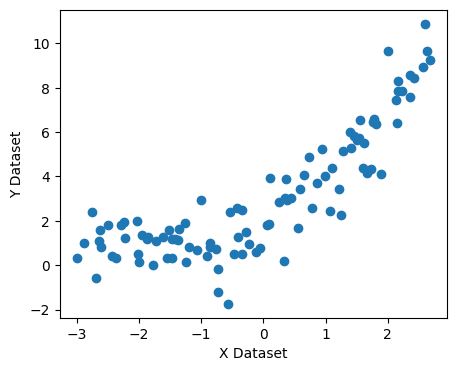

In [11]:
#plotting of dataset
plt.figure(figsize=(5,4))
plt.scatter(X,y)
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')

In [12]:
# train test split
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
# Standardization to PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [14]:
# train Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(X_test_poly)

In [16]:
#cross validation score
validation_score=cross_val_score(model,X_train_poly,y_train,scoring='r2',cv=5)
print(np.mean(validation_score))

0.8086800150743662


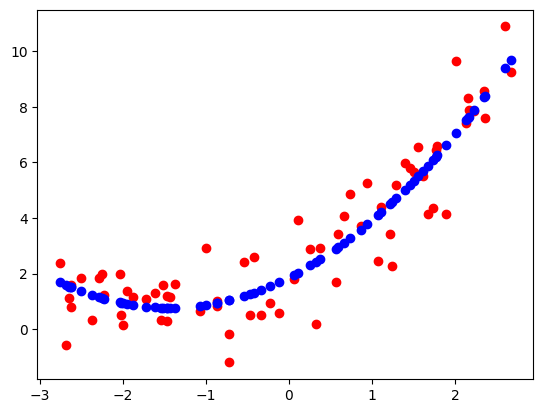

In [17]:
#plot for training data
plt.scatter(X_train,y_train,color="r")
plt.scatter(X_train,model.predict(X_train_poly),color='b')

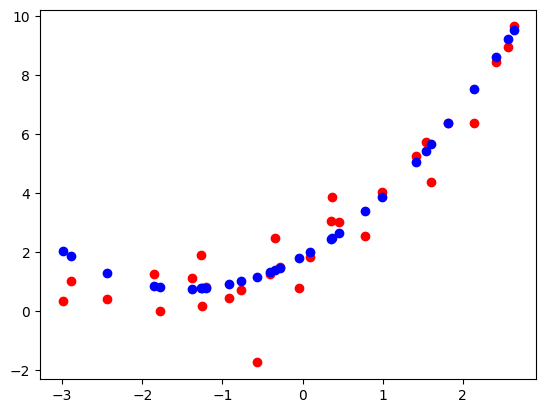

In [18]:
# plot for test data
plt.scatter(X_test,y_test,color="r")
plt.scatter(X_test,y_pred,color='b')

In [36]:
#performance metrics
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.8995217668762524


### NEW DATASET PREDICTION

In [20]:
# Creating New Dataset for Prediction
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

In [21]:
# predicted datapoints
X_new_poly = poly.transform(X_new)
y_new=model.predict(X_new_poly)

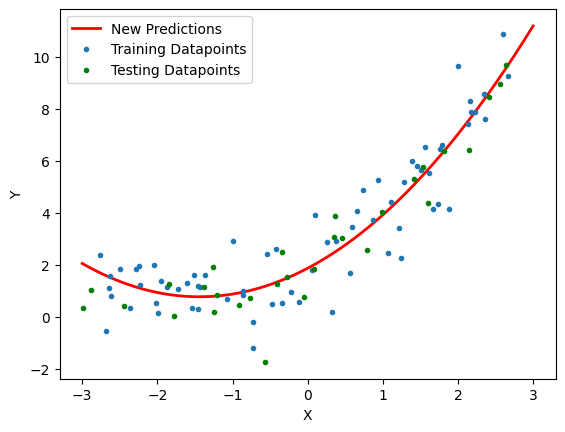

In [30]:
# plotting the prediction line
plt.plot(X_new,y_new,'r-', linewidth=2, label="New Predictions")
plt.plot(X_train,y_train,'.',label="Training Datapoints")
plt.plot(X_test,y_test,'g.',label="Testing Datapoints")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Creating PIPELINE

In [56]:
# Pipeline
from sklearn.pipeline import Pipeline

In [63]:
def Poly_Regression(degree):
  X_new=np.linspace(-3,3,200).reshape(200,1)

  poly_feature=PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg=LinearRegression()
  poly_regression=Pipeline([("poly_feature",poly_feature),("lin_reg",lin_reg)])

  poly_regression.fit(X_train,y_train)

  y_new_pred=poly_regression.predict(X_new)

  #plotting
  plt.plot(X_new,y_new_pred,'r-',linewidth=2,label='New Predictions')
  plt.plot(X_train,y_train,'b.',label='Training Data')
  plt.plot(X_test,y_test,'g.',label='Testing Data')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f"DEGREE {degree}")
  plt.legend()
  plt.show()

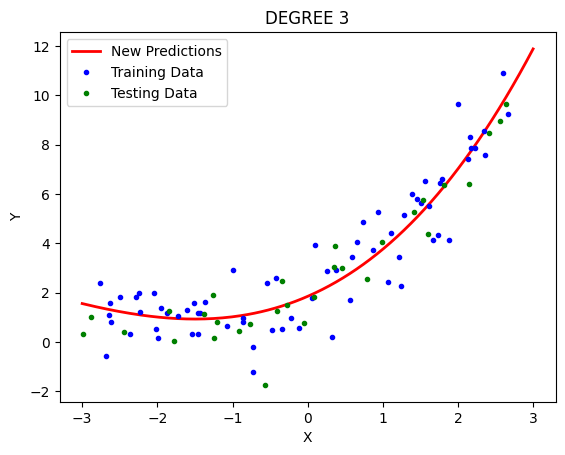

In [73]:
Poly_Regression(3) # Good Fit

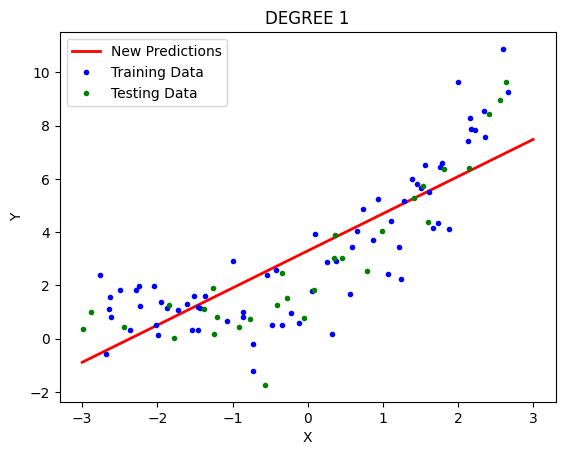

In [72]:
Poly_Regression(1) # Simple Linear Regression/Underfitting

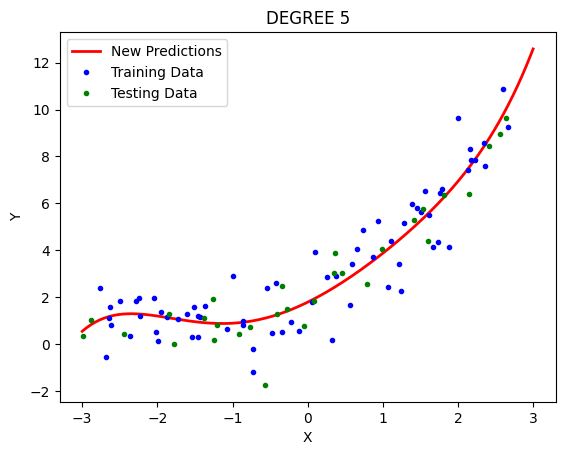

In [67]:
Poly_Regression(5) # Overfitting starts

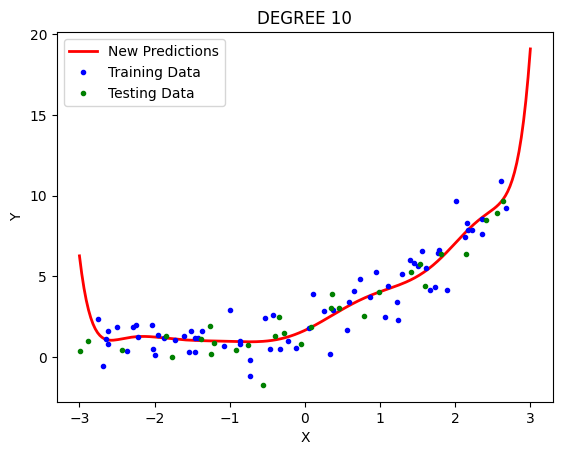

In [68]:
Poly_Regression(10) # High Overfitting